# Monte-Carlo CBA Simulation

Population simulation to determine benefit of Wegovy to insurance providers.

## Parameters

In [1]:
POPULATION_SIZE         = 1000
SIMULATION_YEARS        = 60
PERCENTAGE_COVERED      = 0.7
WEGOVY_COST             = 1_00_000
WEGOVY_ANNUAL_COST      = WEGOVY_COST * PERCENTAGE_COVERED 
RISK_DEVELOPMENT_PERIOD = 20.0

## Probabilities and Costs

In [2]:
efficacy_factors = {
    "Coronary Heart Disease": 0.80,
    "Heart Failure":          0.80,
    "Type 2 Diabetes":        0.29,
    "CKD/DKD":                0.82 
} 

obese_first_order_probs = {
    "18-39": {
        "Coronary Heart Disease":      0.017,
        "CKD/DKD":                     0.024,
        "Depression or Anxiety":       0.441,
        "Dyslipidemia":                0.281,
        "Heart Failure":               0.008,
        "Hypertension":                0.290,
        "Malignancies":                0.019,
        "MASLD/MASH/liver cirrhosis":  0.085,
        "Osteoarthritis":              0.074,
        "Osteoporosis":                0.002,
        "Obstructive Sleep Apnea":     0.130,
        "Polycystic Ovarian Syndrome": 0.074,
        "Prediabetes":                 0.171,
        "Type 2 Diabetes":             0.101
    },
    "40-64": {
        "Coronary Heart Disease":      0.117,
        "CKD/DKD":                     0.088,
        "Depression or Anxiety":       0.390,
        "Dyslipidemia":                0.654,
        "Heart Failure":               0.040,
        "Hypertension":                0.662,
        "Malignancies":                0.080,
        "MASLD/MASH/liver cirrhosis":  0.136,
        "Osteoarthritis":              0.353,
        "Osteoporosis":                0.027,
        "Obstructive Sleep Apnea":     0.266,
        "Polycystic Ovarian Syndrome": 0.011,
        "Prediabetes":                 0.322,
        "Type 2 Diabetes":             0.290
    },
    ">=65": {
        "Coronary Heart Disease":      0.362,
        "CKD/DKD":                     0.314,
        "Depression or Anxiety":       0.389,
        "Dyslipidemia":                0.880,
        "Heart Failure":               0.190,
        "Hypertension":                0.894,
        "Malignancies":                0.226,
        "MASLD/MASH/liver cirrhosis":  0.118,
        "Osteoarthritis":              0.650,
        "Osteoporosis":                0.155,
        "Obstructive Sleep Apnea":     0.306,
        "Polycystic Ovarian Syndrome": 0.001,
        "Prediabetes":                 0.353,
        "Type 2 Diabetes":             0.443
    }
}

non_obese_first_order_probs = {
    "18-39": {
        "Coronary Heart Disease":      0.005,
        "CKD/DKD":                     0.008,
        "Depression or Anxiety":       0.289,
        "Dyslipidemia":                0.099,
        "Heart Failure":               0.002,
        "Hypertension":                0.071,
        "Malignancies":                0.011,
        "MASLD/MASH/liver cirrhosis":  0.019,
        "Osteoarthritis":              0.025,
        "Osteoporosis":                0.002,
        "Obstructive Sleep Apnea":     0.019,
        "Polycystic Ovarian Syndrome": 0.016,
        "Prediabetes":                 0.044,
        "Type 2 Diabetes":             0.020,
    },
    "40-64": {
        "Coronary Heart Disease":      0.056,
        "CKD/DKD":                     0.036,
        "Depression or Anxiety":       0.274,
        "Dyslipidemia":                0.423,
        "Heart Failure":               0.012,
        "Hypertension":                0.338,
        "Malignancies":                0.059,
        "MASLD/MASH/liver cirrhosis":  0.053,
        "Osteoarthritis":              0.189,
        "Osteoporosis":                0.037,
        "Obstructive Sleep Apnea":     0.066,
        "Polycystic Ovarian Syndrome": 0.003,
        "Prediabetes":                 0.159,
        "Type 2 Diabetes":             0.101,
    },
    ">=65": {
        "Coronary Heart Disease":      0.261,
        "CKD/DKD":                     0.204,
        "Depression or Anxiety":       0.320,
        "Dyslipidemia":                0.751,
        "Heart Failure":               0.110,
        "Hypertension":                0.708,
        "Malignancies":                0.198,
        "MASLD/MASH/liver cirrhosis":  0.064,
        "Osteoarthritis":              0.486,
        "Osteoporosis":                0.216,
        "Obstructive Sleep Apnea":     0.091,
        "Polycystic Ovarian Syndrome": 0.000,
        "Prediabetes":                 0.248,
        "Type 2 Diabetes":             0.218,
    },
}

second_order_probs = {
    "CKD/DKD": {
        "Coronary Heart Disease": {
            "18-39": 0.125,
            "40-64": 0.341,
            ">=65":  0.509
        },
        "Heart Failure": {
            "18-39": 0.208,
            "40-64": 0.213,
            ">=65":  0.299
        },
        "Hypertension": {
            "18-39": 0.833,
            "40-64": 0.909,
            ">=65":  0.949
        }
    },
    "Depression or Anxiety": {
        "Coronary Heart Disease": {
            "18-39": 0.031,
            "40-64": 0.228,
            ">=65":  0.334
        },
        "Heart Failure": {
            "18-39": 0.018,
            "40-64": 0.103,
            ">=65":  0.266
        },
        "Osteoarthritis": {
            "18-39": 0.091,
            "40-64": 0.412,
            ">=65":  0.683
        }
    },
    "Dyslipidemia": {
        "Coronary Heart Disease": {
            "18-39": 0.024,
            "40-64": 0.167,
            ">=65":  0.398
        },
        "Hypertension": {
            "18-39": 0.413,
            "40-64": 0.758,
            ">=65":  0.932
        },
        "MASLD/MASH/liver cirrhosis": {
            "18-39": 0.128,
            "40-64": 0.193,
            ">=65":  0.128
        },
        "Type 2 Diabetes": {
            "18-39": 0.142,
            "40-64": 0.386,
            ">=65":  0.479
        }
    },
    "Heart Failure": {
        "Coronary Heart Disease": {
            "18-39": 0.750,
            "40-64": 0.850,
            ">=65":  0.858
        },
        "CKD/DKD": {
            "18-39": 0.750,
            "40-64": 0.880,
            ">=65":  0.821
        },
        "Depression or Anxiety": {
            "18-39": 0.438,
            "40-64": 0.390,
            ">=65":  0.337
        },
        "Hypertension": {
            "18-39": 0.875,
            "40-64": 0.925,
            ">=65":  0.932
        },
        "Obstructive Sleep Apnea": {
            "18-39": 0.500,
            "40-64": 0.665,
            ">=65":  0.765
        }
    },
    "Hypertension": {
        "Coronary Heart Disease": {
            "18-39": 0.029,
            "40-64": 0.171,
            ">=65":  0.396
        },
        "Heart Failure": {
            "18-39": 0.014,
            "40-64": 0.059,
            ">=65":  0.209
        },
        "Obstructive Sleep Apnea": {
            "18-39": 0.224,
            "40-64": 0.402,
            ">=65":  0.342
        },
        "CKD/DKD": {
            "18-39": 0.041,
            "40-64": 0.130,
            ">=65":  0.346
        },
        "Type 2 Diabetes": {
            "18-39": 0.172,
            "40-64": 0.363,
            ">=65":  0.482
        }
    },
    "MASLD/MASH/liver cirrhosis": {
        "Dyslipidemia": {
            "18-39": 0.825,
            "40-64": 0.946,
            ">=65":  0.942
        },
        "Type 2 Diabetes": {
            "18-39": 0.594,
            "40-64": 0.629,
            ">=65":  0.752
        },
        "Hypertension": {
            "18-39": 0.471,
            "40-64": 0.728,
            ">=65":  0.822
        }
    },
    "Osteoarthritis": {
        "Depression or Anxiety": {
            "18-39": 0.596,
            "40-64": 0.552,
            ">=65":  0.598
        },
        "Hypertension": {
            "18-39": 0.392,
            "40-64": 0.668,
            ">=65":  0.891
        }
    },
    "Obstructive Sleep Apnea": {
        "Coronary Heart Disease": {
            "18-39": 0.039,
            "40-64": 0.263,
            ">=65":  0.409
        },
        "Heart Failure": {
            "18-39": 0.018,
            "40-64": 0.090,
            ">=65":  0.255
        },
        "Hypertension": {
            "18-39": 0.446,
            "40-64": 0.754,
            ">=65":  0.885
        },
        "Type 2 Diabetes": {
            "18-39": 0.231,
            "40-64": 0.436,
            ">=65":  0.508
        }
    },
    "Prediabetes": {
        "Type 2 Diabetes": {
            "18-39": 0.117,
            "40-64": 0.239,
            ">=65":  0.239
        },
        "Hypertension": {
            "18-39": 0.410,
            "40-64": 0.710,
            ">=65":  0.912
        }
    },
    "Type 2 Diabetes": {
        "Heart Failure": {
            "18-39": 0.030,
            "40-64": 0.134,
            ">=65":  0.361
        },
        "MASLD/MASH/liver cirrhosis": {
            "18-39": 0.574,
            "40-64": 0.586,
            ">=65":  0.533
        },
        "Coronary Heart Disease": {
            "18-39": 0.059,
            "40-64": 0.293,
            ">=65":  0.497
        },
        "CKD/DKD": {
            "18-39": 0.238,
            "40-64": 0.303,
            ">=65":  0.709
        },
        "Obstructive Sleep Apnea": {
            "18-39": 0.231,
            "40-64": 0.402,
            ">=65":  0.409
        }
    },
    "Malignancies": {
        "Heart Failure": {
            "18-39": 0,
            "40-64": 0.105,
            ">=65":  0.194
        },
        "Depression or Anxiety": {
            "18-39": 0,
            "40-64": 0.103,
            ">=65":  0.125
        }
    },
    "Osteoporosis": {
        "Depression or Anxiety": {
            "18-39": 0,
            "40-64": 0.105,
            ">=65":  0.111
        }
    },
    "Polycystic Ovarian Syndrome": {
        "Prediabetes": {
            "18-39": 0.473,
            "40-64": 0,
            ">=65":  0
        },
        "Type 2 Diabetes": {
            "18-39": 0.270,
            "40-64": 0,
            ">=65":  0
        }
    }
}

annual_costs = {
    "CKD/DKD":                     312000, 
    "Type 2 Diabetes":             20000, 
    "Polycystic Ovarian Syndrome": 20000,
    "Heart Failure":               15000, 
    "Hypertension":                10000, 
    "MASLD/MASH/liver cirrhosis":  10000,
    "Dyslipidemia":                10000, 
    "Prediabetes":                 5000, 
    "Depression or Anxiety":       5000,
    "Coronary Heart Disease":      5000, 
    "Obstructive Sleep Apnea":     5000, 
    "Osteoporosis":                5000,
    "Osteoarthritis":              5000, 
    "Malignancies":                5000
}

one_time_costs = {
    "Malignancies":                1200000, 
    "CKD/DKD":                     1000000, 
    "Heart Failure":               450000,
    "Coronary Heart Disease":      360000, 
    "Osteoarthritis":              280000, 
    "MASLD/MASH/liver cirrhosis":  300000,
    "Type 2 Diabetes":             250000, 
    "Hypertension":                250000, 
    "Osteoporosis":                150000,
    "Depression or Anxiety":       100000, 
    "Obstructive Sleep Apnea":     80000, 
    "Polycystic Ovarian Syndrome": 70000
}

## Helper Methods

In [3]:
def get_age_group(age):
	if 18 <= age < 40:   return "18-39"
	elif 40 <= age < 65: return "40-64"
	else:                return ">=65"

## Individual Class

In [4]:
import numpy as np


class Individual:
	def __init__(self, start_age=18) -> None:
		self.age                 = 18
		self.bmi                 = np.random.beta(2, 5) * 10 + 30
		self.insurance_start_age = start_age
		self.conditions          = set([])
		self.interventions       = set([])
		self.on_wegovy           = False


	def __str__(self) -> str:
		return f"<Individual | age:{self.age} ({self.insurance_start_age}) | bmi:{self.bmi}>"


	def update(self):
		removal = set([])

		if self.on_wegovy:
			for condition in self.conditions:
				if np.random.rand() < 0.5: removal.add(condition)

		self.conditions -= removal

		age_cat        = get_age_group(self.age)
		new_conditions = set([])

		if self.conditions:
			for fo_condition in self.conditions:
				so_dict = second_order_probs.get(fo_condition, {})

				for so_condition, probs in so_dict.items():
					if np.random.rand() < probs[age_cat]: new_conditions.add(so_condition)

		first_order_probs = obese_first_order_probs if self.bmi > 30 else non_obese_first_order_probs

		for condition, prob in first_order_probs[age_cat].items():
			if np.random.rand() < prob: new_conditions.add(condition)
				
		self.conditions |= new_conditions

		# age one year
		self.age += 1


	def cost_to_insurer(self):
		total_cost = 0
		
		for condition in self.conditions:
			if one_time_costs.get(condition):

				# perform initial one-time intervention
				if condition not in self.interventions:
					self.interventions.add(condition)
					total_cost += one_time_costs[condition]
					
					continue


			total_cost += annual_costs[condition]
		
		if self.on_wegovy: total_cost += WEGOVY_ANNUAL_COST

		return total_cost

## Simulation Methods

In [5]:
def get_age_group(age):
	if 18 <= age <= 39:   return "18-39"
	elif 40 <= age <= 64: return "40-64"
	else:                 return ">=65"


def create_population(size):
	age_dist    = { "18-39": 0.4, "40-64": 0.6 }
	individuals = []

	for age_cat, prob in age_dist.items():
		count = int(size * prob)
		
		for _ in range(count):
			if age_cat == "18-39": individuals.append(Individual(np.random.randint(18, 39 + 1)))
			if age_cat == "40-64": individuals.append(Individual(np.random.randint(40, 64 + 1)))

	return individuals

## Simulation Loop

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

individuals = create_population(100)

years_grid = np.arange(0, 63, 1.0)

trajectories_no  = []
trajectories_weg = []

for person in individuals:
	
	# without wegovy
	i = deepcopy(person)
	
	cost     = 0.0
	ages     = [i.age]
	cum_cost = [0.0]

	while i.age < 80:
		i.update()
		if i.age >= i.insurance_start_age: cost += i.cost_to_insurer()
	   
		ages.append(i.age)
		cum_cost.append(cost)

	ages_arr = np.asarray(ages, dtype=float)
	cost_arr = np.asarray(cum_cost, dtype=float)
	
	query_ages = i.insurance_start_age + years_grid
	query_ages = np.minimum(query_ages, 80.0)  # flatline past 80
	
	idx  = np.searchsorted(ages_arr, query_ages, side="right") - 1
	idx  = np.clip(idx, 0, len(cost_arr) - 1)
	traj_no = cost_arr[idx]
	
	trajectories_no.append(traj_no)

	# with wegovy
	i = deepcopy(person)
	
	cost        = 0.0
	ages        = [i.age]
	cum_cost    = [0.0]

	while i.age < 80:
		i.update()
		
		if i.age >= i.insurance_start_age: cost += i.cost_to_insurer()
		
		if i.age == i.insurance_start_age: 
			i.on_wegovy = True
			i.bmi *= 0.70  # one-time maintained 15% reduction
	
		ages.append(i.age)
		cum_cost.append(cost)

	ages_arr = np.asarray(ages, dtype=float)
	cost_arr = np.asarray(cum_cost, dtype=float)
	
	query_ages = i.insurance_start_age + years_grid
	query_ages = np.minimum(query_ages, 80.0)  # flatline past 80
	
	idx  = np.searchsorted(ages_arr, query_ages, side="right") - 1
	idx  = np.clip(idx, 0, len(cost_arr) - 1)
	traj_weg = cost_arr[idx]
	
	trajectories_weg.append(traj_weg)

# stack and average
trajectories_no  = np.vstack(trajectories_no)
trajectories_weg = np.vstack(trajectories_weg)

avg_no  = trajectories_no.mean(axis=0)
avg_weg = trajectories_weg.mean(axis=0)

## Plot Results

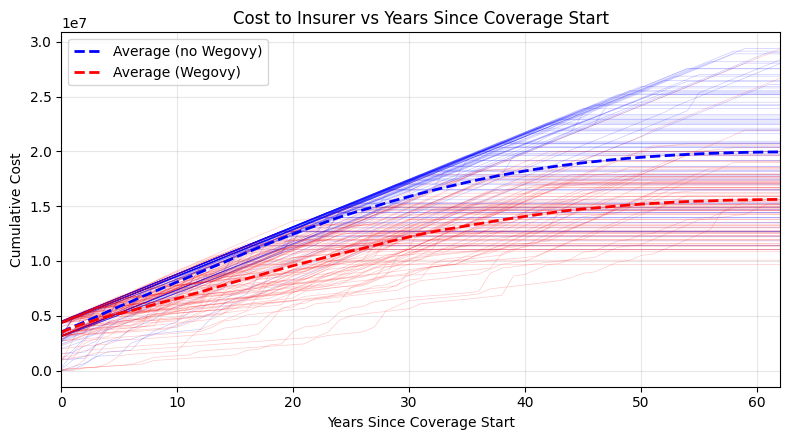

In [7]:

plt.figure(figsize=(8, 4.5))

# individual trajectories
plt.plot(years_grid, trajectories_no.T,  color="blue", alpha=0.2, linewidth=0.5)  # without Wegovy
plt.plot(years_grid, trajectories_weg.T, color="red",  alpha=0.2, linewidth=0.5)  # with Wegovy

# average curves
plt.plot(years_grid, avg_no,  color="blue", linewidth=2.0, linestyle="--", label="Average (no Wegovy)")
plt.plot(years_grid, avg_weg, color="red",  linewidth=2.0, linestyle="--", label="Average (Wegovy)")

plt.title("Cost to Insurer vs Years Since Coverage Start")
plt.xlabel("Years Since Coverage Start")
plt.ylabel("Cumulative Cost")
plt.xlim(0, years_grid[-1])
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()